In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import h5py
from pathlib import Path
from tqdm import tqdm
from scipy.signal import convolve2d, convolve
import torch

In [2]:
import os
import sys
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
sys.path.append('..')

In [4]:
from hpst.dataset.heterogenous_sparse_sim_dataset_2d import HeterogenousSparseDataset

In [5]:
TESTING_FILE = "/home/roblesee/dune/hpst/data/sim_data/train"

In [16]:
!ls "/home/roblesee/dune/hpst/data/sim_data/train_cache"

2d_cache_0.0_0.085.pt	cache_0.0_0.085.pt  cache_0.85_0.865.pt
2d_cache_0.85_0.865.pt	cache_0.0_0.85.pt   cache_0.85_1.0.pt


In [17]:
dataset = HeterogenousSparseDataset(TESTING_FILE, limit_index=(0.0,0.085))

/home/roblesee/dune/hpst/data/sim_data/train


/home/roblesee/dune/hpst/notebooks/../hpst/dataset/heterogenous_sparse_sim_dataset_2d.py:58: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cache = torch.load(CACHE_FILE)


torch.Size([9587741])
tensor(0) tensor(7)
tensor([ 372937, 3278615, 1424696,  686860,  413954, 1644336, 1665140,  101211])


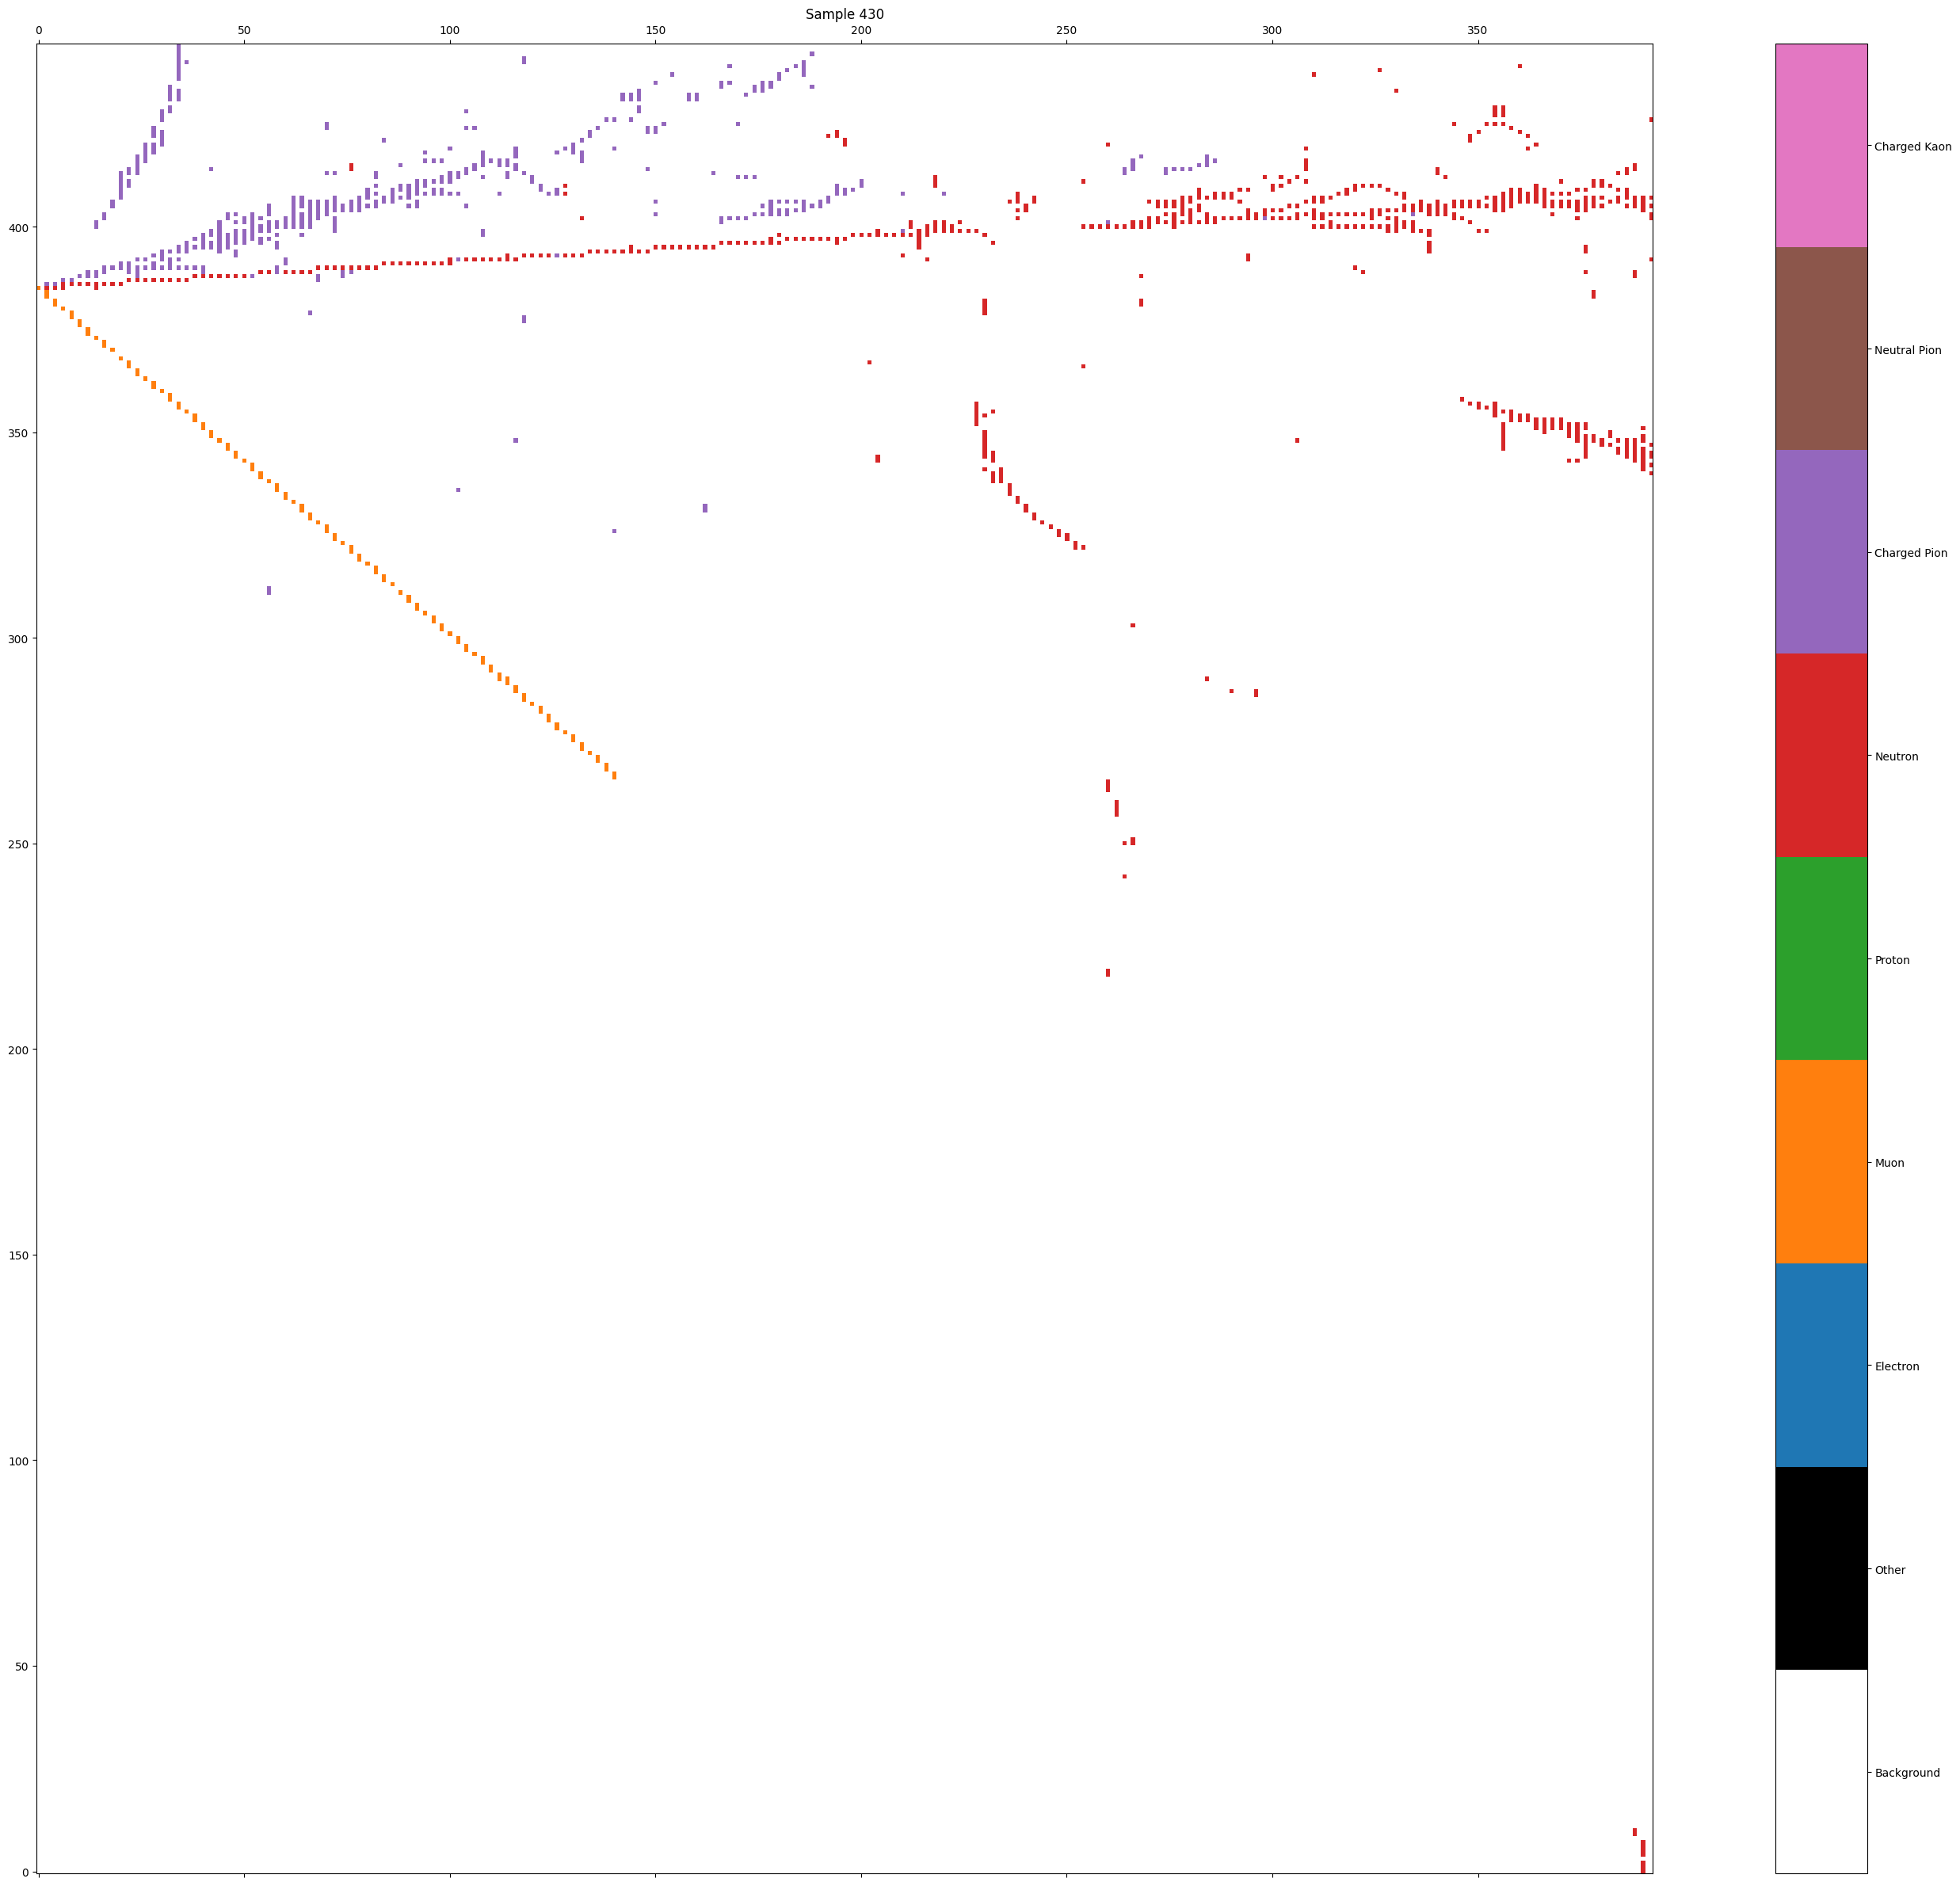

In [18]:
skip = 14*30
i = 7
targets_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("targets", colors=["#FFFFFF", "#000000", "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", '#8c564b', '#e377c2'], N=9)

(did,   ( features_x, 
        coordinates_x, 
        targets_x,
        object_targets_x,),
        ( features_y, 
        coordinates_y, 
        targets_y,
        object_targets_y,)) = dataset[i + skip]
coordinates_x = (coordinates_x - coordinates_x.amin(dim=0, keepdim=True)).to(torch.int64)
mat_size = coordinates_x.amax(dim=0) + 1
mat2d = np.zeros((mat_size[1], mat_size[0]))

mat2d[coordinates_x[:,1], coordinates_x[:,0]] = targets_x

scale = 10
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(scale*4,scale*3))
ax = axs
#mat2d[mat2d == 0] = np.nan
ax.set_title(f"Sample {did}")
im = ax.matshow(mat2d.T, cmap=targets_cmap, vmin=-0.5, vmax=8.5)
ax.invert_yaxis()
cbar = fig.colorbar(im, ticks=[0,1,2,3,4,5,6,7, 8], ax=ax)
cbar.ax.set_yticklabels(["Background", "Other", "Electron", "Muon", "Proton", "Neutron", "Charged Pion", "Neutral Pion", "Charged Kaon"])
plt.show()